# L2 cache Pseudo LRU replacement

In [1]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np

In [6]:
politics = ['lru', 'plru']

def get_hitrate(cache):
    hit = cache["LOAD"]["hit"][0]
    miss = cache["LOAD"]["miss"][0]
    return hit / (hit + miss)


def get_stats(stat_file):
    with open(stat_file, 'r') as file:
        json_data = json.load(file)
        roi = json_data[0]["roi"]
        stats = roi["cores"][0]
        name = json_data[0]['traces'][0].split('/')[-1]
    ipc = stats["instructions"] / stats["cycles"]
    hitrate = get_hitrate(roi["cpu0_L2C"])
    return ipc, hitrate, name

results = {}
for pol in politics:
    results[pol] = {}
    for stat_file in os.listdir(pol):
        stat_path = os.path.join(pol, stat_file)
        ipc, hitrate, name = get_stats(stat_path)
        results[pol][name] = {'ipc' : ipc, 'hitrate' : hitrate}

In [8]:
def geomean(data):
    return np.power(np.prod(np.array(data)), 1 / len(data))

for pol in politics:
    ipc = []
    hitrate = []
    for (_, metrics) in results[pol].items():
        ipc.append(metrics['ipc'])
        hitrate.append(metrics['hitrate'])
    ipc_gmean = geomean(ipc)
    hitrate_gmean = geomean(hitrate)
    print(f'{pol}\n\tIPC : {ipc_gmean}\n\thitrate : {hitrate_gmean}')

lru
	IPC : 1.1746013523417302
	hitrate : 0.1889834703816908
plru
	IPC : 1.1756464977456504
	hitrate : 0.19081997766713166


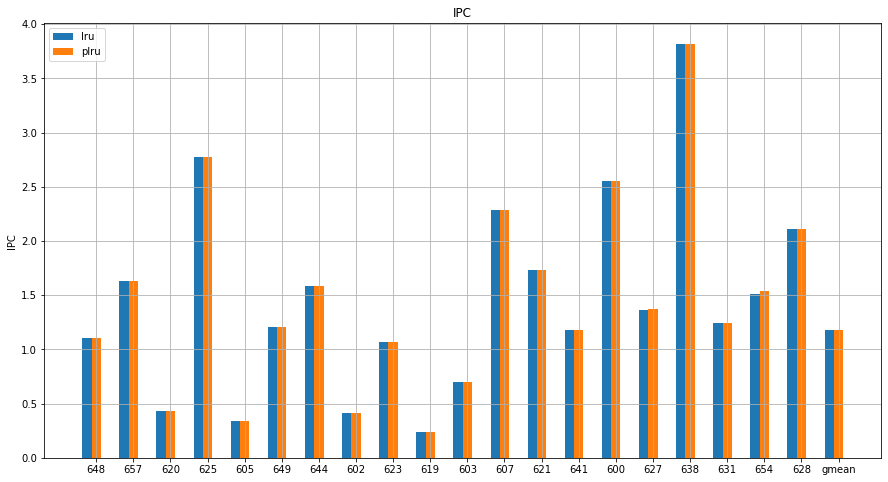

In [9]:
benches = list(results[politics[0]])
pol_ipc = {}
for pol, metrics in results.items():
    pol_ipc[pol] = []
    for bench in benches:
        pol_ipc[pol].append(results[pol][bench]['ipc'])
benches.append('gmean')
for pol in pol_ipc:
    gmean = geomean(pol_ipc[pol])
    pol_ipc[pol].append(gmean)

fig, ax =  plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)
ax.grid()
x = np.arange(len(benches))
width = 0.25  # the width of the bars
multiplier = 0

for pol, ipc in pol_ipc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, ipc, width, label=pol)
    multiplier += 1

ax.set_ylabel('IPC')
ax.set_title('IPC')
ax.set_xticks(x + width, list(map(lambda b : b.split('.')[0], benches)))
ax.legend(loc='upper left')

plt.show()

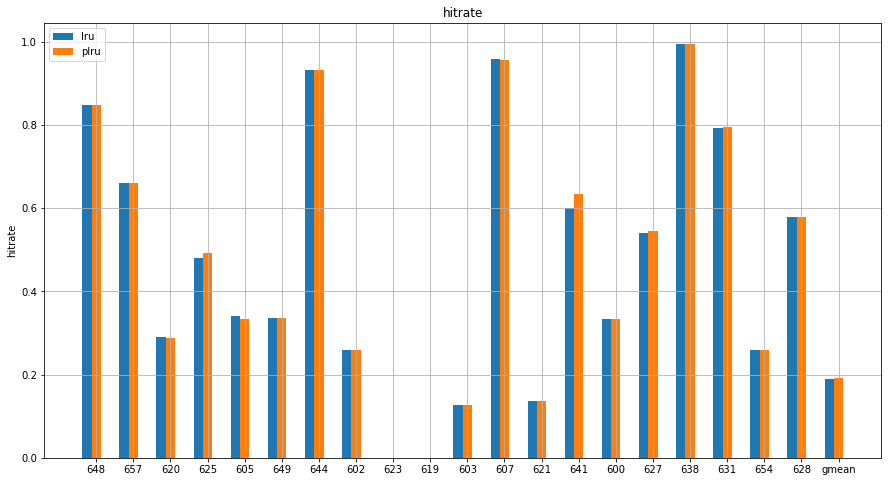

In [10]:
benches = list(results[politics[0]])
pol_ipc = {}
for pol, metrics in results.items():
    pol_ipc[pol] = []
    for bench in benches:
        pol_ipc[pol].append(results[pol][bench]['hitrate'])
benches.append('gmean')
for pol in pol_ipc:
    gmean = geomean(pol_ipc[pol])
    pol_ipc[pol].append(gmean)

fig, ax =  plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(8)
ax.grid()
x = np.arange(len(benches))
width = 0.25  # the width of the bars
multiplier = 0

for pol, ipc in pol_ipc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, ipc, width, label=pol)
    multiplier += 1

ax.set_ylabel('hitrate')
ax.set_title('hitrate')
ax.set_xticks(x + width, list(map(lambda b : b.split('.')[0], benches)))
ax.legend(loc='upper left')

plt.show()